In [1]:
import spacy 
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import en_core_web_sm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\503TS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import tweepy
consumer_key = "icxFyqmzRPlDwArT63LTjYXoF"
consumer_secret = "xgdM6H4pF9nKhcMNXiJezqiZFwYMJj3Em7xyAFmdfGsdbMZY2C"
access_token = "1453879058169667584-RmN4uqFInwYm3eGbMk3YTTx5r1bLfO"
access_token_secret = "MN9B05YkwFK08lDKfsdfvJodwL2TQdluRgO0HzUuLPgbI"

In [4]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [5]:
public_tweets = api.home_timeline(count=500,tweet_mode='extended')
j = 1;
for tweet in public_tweets:
    print(str(j) + '). ' + tweet.full_text)
    j=j+1

1). How can today’s students, educational institutions and industry get ready for the workplaces of tomorrow? 
https://t.co/ktjW3uvgEi
2). Chennai: 17-year-old girl who delivered baby was raped by mom’s lovers https://t.co/rDB8Fyh7C2 https://t.co/IJ3kyQQluN
3). New rules coming for credit and debit cards starting January 1: What's changing and how https://t.co/K0nlsGluyO via @gadgetsnow
4). Thailand temporarily suspends issuance of 'Thailand Pass' amid #Omicron threat

For more updates from across the world, follow @DDIndialive &amp; subscribe to https://t.co/BiAOQzuCpp https://t.co/B30rw46KjG
5). Realme GT 2 Pro launch date revealed: Here’s what is confirmed and what is not https://t.co/64JX9M4Bh3
6). #COVID19 | Today’s Vaccination Update - the latest #CovidVaccination equation for Wednesday, December 22. https://t.co/bRgdDHg0RQ
7). 4,690 arrested under UAPA, 149 convicted: Government tells Rajya Sabha https://t.co/hJdyUCxZaL
8). DRDO conducts maiden launch of indigenously developed n

In [6]:
#Createing a dataframe with collumn called tweet
df = pd.DataFrame( [tweet.full_text for tweet in public_tweets], columns=['tweets'])

In [7]:
df.head()

,tweets
0,"How can today’s students, educational institut..."
1,Chennai: 17-year-old girl who delivered baby w...
2,New rules coming for credit and debit cards st...
3,Thailand temporarily suspends issuance of 'Tha...
4,Realme GT 2 Pro launch date revealed: Here’s w...


In [8]:
# remove the hashtags, mentions and unwanted characters.
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+', '',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    return text
df['tweets'] = df['tweets'].apply(clean_text)

In [9]:
df.head()

,tweets
0,"How can today’s students, educational institut..."
1,Chennai: 17-year-old girl who delivered baby w...
2,New rules coming for credit and debit cards st...
3,Thailand temporarily suspends issuance of 'Tha...
4,Realme GT 2 Pro launch date revealed: Here’s w...


In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\503TS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
nlp = en_core_web_sm.load() 
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))

 #already taken care of with the cleaning function.

punctuation = list(string.punctuation)
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
       if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return ' '.join(final_text)
df['tweets'] = df.tweets.apply(furnished)

In [12]:
economy_related_words = '''agriculture infrastructure capitalism trading service sector technology  economical supply industrialism efficiency frugality retrenchment downsizing   credit debit value economize   save  economically economies sluggish rise   rising spending conserve trend low-management  decline   industry impact poor  profession    surplus   fall declining  accelerating interest sectors balance stability productivity increase rates pushing expanding stabilize  rate industrial borrowing strugglingdeficit predicted    increasing  data economizer analysts investment market-based economy   debt free enterprise medium  exchange metric savepoint scarcity capital bank company stockholder fund business  
asset treasury tourism incomes contraction employment jobs upturn deflation  macroeconomics bankruptcies exporters hyperinflation dollar entrepreneurship upswing marketplace commerce devaluation quicksave deindustrialization stockmarket reflation downspin dollarization withholder bankroll venture capital mutual fund plan economy mortgage lender unemployment rate credit crunch central bank financial institution bank rate custom duties mass-production black-market developing-countries developing economic-growth gdp trade barter distribution downturn economist'''

social_related_words = '''sociable gregarious cultural politics societal friendly society socialization political mixer sociality interpersonal ethnic socially party welfare economic public health community socialist societies development educational intellectual religious social network humans socialism collective personal corporation social constructivism relations of production organisms animals volition socii citizenship brute beast animal multiethnic ethnical fauna creature herding attitude rights swarming socio sociological sociopolitical socioeconomic ethics civic multi-ethnic communal marital corporate education sociale socialized communities employment human policies industrial focus sustainable 
creating civil reform fringe undesirable governance issues multiparty policy emphasis employee tea unions nets perspective urban subsidised culture focuses environment parasite fiesta institutions focusing values labour poverty particular own creation focused awareness company governmental promote labor aspects organizations change critical jamboree promoting festivity create work context the changing integration poor organizational ideas reforms institutional fairness ways learning support challenges care leadership important interests kuomintang sides progressive fundamental example among attention moreover basic activism advancement experience problems understanding name life desa stock sociocultural'''

health_related_words = '''disease obesity world health organization medicine nutrition well-being exercise welfare wellness health care public health nursing stress safety hygiene research social healthy condition aids epidemiology healthiness wellbeing care illness medical diet education infectious disease environmental healthcare physical fitness hospitals health care provider doctors healthy community design insurance sanitation human body patient mental health
medicare agriculture health science fitness health policy weight loss physical therapy psychology pharmacy metabolic organism human lifestyle status unhealthy upbeat vaccination sleep condom alcohol smoking water family eudaimonia eudaemonia air house prevention genetics public families poor needs treatment communicable disease study centers improve problems experts services benefits treating hiv agencies benefit patients concerned risk tuberculosis according protection malaria development food priority'''

culture_related_words = '''society civilization philosophy anthropology subculture acculturation religion cultivation nationalism counterculture cultural ideology art popular culture folklore agriculture country writing music monoculture cyberculture language social class high culture cultural studies cultural anthropology cooking literature science growth tillage grow ritual perfection development metaphor concept symbol mythology gender tradition
clothing edward burnett tylor traditions traditional western culture contemporary multiculturalism elite politics ethnicity heritage sociology modernity spirituality marxism material culture low culture mass culture critical theory ethos nationality humanism romanticism finish polish refinement civilisation traditionalism genetics human learning interaction kinship heredity marriage dance technology shelter indigenous peoples of the americas growing biology starter viticulture discernment content maturation appreciation ontogeny'''

In [13]:
economy = furnished(economy_related_words)
social = furnished(social_related_words)
culture = furnished(culture_related_words)
health = furnished(health_related_words)

In [14]:
string1 = economy
words = string1.split()
economy = " ".join(sorted(set(words), key=words.index))
economy


'agriculture infrastructure capitalism trading service sector technology economical supply industrialism efficiency frugality retrenchment downsizing credit debit value economize save economically economy sluggish rise rising spending conserve trend low-management decline industry impact poor profession surplus fall declining accelerating interest balance stability productivity increase rate pushing expanding stabilize industrial borrowing strugglingdeficit predicted increasing data economizer analyst investment market-based debt free enterprise medium exchange metric savepoint scarcity capital bank company stockholder fund business asset treasury tourism income contraction employment job upturn deflation macroeconomics bankruptcy exporter hyperinflation dollar entrepreneurship upswing marketplace commerce devaluation quicksave deindustrialization stockmarket reflation downspin dollarization withholder bankroll venture mutual plan mortgage lender unemployment crunch central financial i

In [15]:
string1 = social
words = string1.split()
social = " ".join(sorted(set(words), key=words.index))
social

'sociable gregarious cultural politics societal friendly society socialization political mixer sociality interpersonal ethnic socially party welfare economic public health community socialist development educational intellectual religious social network human socialism collective personal corporation constructivism relation production organism animal volition socii citizenship brute beast multiethnic ethnical fauna creature herding attitude right swarming socio sociological sociopolitical socioeconomic ethic civic multi-ethnic communal marital corporate education sociale socialized employment policy industrial focus sustainable creating civil reform fringe undesirable governance issue multiparty emphasis employee tea union net perspective urban subsidised culture environment parasite fiesta institution focusing value labour poverty particular creation focused awareness company governmental promote labor aspect organization change critical jamboree promoting festivity create work contex

In [16]:
string1 = health
words = string1.split()
health = " ".join(sorted(set(words), key=words.index))
health

'disease obesity world health organization medicine nutrition well-being exercise welfare wellness care public nursing stress safety hygiene research social healthy condition aid epidemiology healthiness wellbeing illness medical diet education infectious environmental healthcare physical fitness hospital provider doctor community design insurance sanitation human body patient mental medicare agriculture science policy weight loss therapy psychology pharmacy metabolic organism lifestyle status unhealthy upbeat vaccination sleep condom alcohol smoking water family eudaimonia eudaemonia air house prevention genetics poor need treatment communicable study center improve problem expert service benefit treating hiv agency concerned risk tuberculosis according protection malaria development food priority'

In [17]:
string1 = culture
words = string1.split()
culture = " ".join(sorted(set(words), key=words.index))
culture

'society civilization philosophy anthropology subculture acculturation religion cultivation nationalism counterculture cultural ideology art popular culture folklore agriculture country writing music monoculture cyberculture language social class high study cooking literature science growth tillage grow ritual perfection development metaphor concept symbol mythology gender tradition clothing edward burnett tylor traditional western contemporary multiculturalism elite politics ethnicity heritage sociology modernity spirituality marxism material low mass critical theory ethos nationality humanism romanticism finish polish refinement civilisation traditionalism genetics human learning interaction kinship heredity marriage dance technology shelter indigenous people america growing biology starter viticulture discernment content maturation appreciation ontogeny'

In [18]:
#Jaccard Similarity Scores
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores
e_scores = get_scores(economy, df.tweets.to_list())
s_scores = get_scores(social, df.tweets.to_list())
c_scores = get_scores(culture, df.tweets.to_list())
h_scores = get_scores(health, df.tweets.to_list())

In [19]:
df.head()

,tweets
0,"today’s students, educational institution indu..."
1,chennai: 17-year-old girl delivered baby raped...
2,new rule coming credit debit card starting jan...
3,thailand temporarily suspends issuance 'thaila...
4,realme gt 2 pro launch date revealed: here’s c...


In [20]:
# create a jaccard scored df.
data  = {'names':df.tweets.to_list(),       'economic_score':e_scores,
         'social_score': s_scores, 'culture_score':c_scores, 'health_scores':h_scores}
scores_df = pd.DataFrame(data)
#assign classes based on highest score
def get_classes(l1, l2, l3, l4):
    econ = []
    socio = []
    cul = []
    heal = []
    for i, j, k, l in zip(l1, l2, l3, l4):
        m = max(i, j, k, l)
        if m == i:
            econ.append(1)
        else:
            econ.append(0)
        if m == j:
            socio.append(1)
        else:
            socio.append(0)        
        if m == k:
            cul.append(1)
        else:
            cul.append(0)  
        if m == l:
            heal.append(1)
        else:
            heal.append(0)   
            
    return econ, socio, cul, heal
l1 = scores_df.economic_score.to_list()
l2 = scores_df.social_score.to_list()
l3 = scores_df.culture_score.to_list()
l4 = scores_df.health_scores.to_list()
econ, socio, cul, heal = get_classes(l1, l2, l3, l4)
data = {'name': scores_df.names.to_list(), 'economic':econ, 'social':socio, 'culture':cul, 'health': heal}
class_df = pd.DataFrame(data)
#grouping the tweets by username
new_groups_df = class_df.groupby(['name']).sum()
#add a new totals column
new_groups_df['total'] = new_groups_df['health'] + new_groups_df['culture'] + new_groups_df['social'] +  new_groups_df['economic']
#add a new totals row
new_groups_df.loc["Total"] = new_groups_df.sum()  

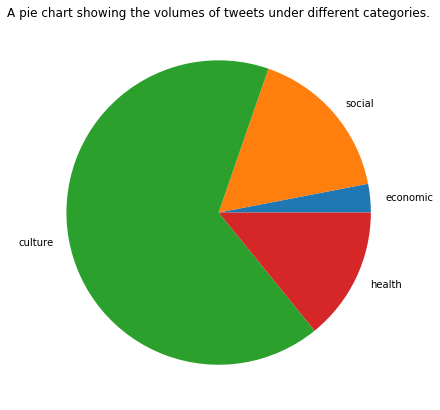

In [21]:
fig = plt.figure(figsize =(10, 7)) 
a = new_groups_df.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show()

In [22]:
df

,tweets
0,"today’s students, educational institution indu..."
1,chennai: 17-year-old girl delivered baby raped...
2,new rule coming credit debit card starting jan...
3,thailand temporarily suspends issuance 'thaila...
4,realme gt 2 pro launch date revealed: here’s c...
...,...
190,nitiaayog &amp; join hand address issue relate...
191,here's rbi's new rule online debit credit card...
192,consider context omicron india. think health c...
193,"opinion, booster must. two dos vaccine protect..."


In [23]:
scores_df

,names,economic_score,social_score,culture_score,health_scores
0,"today’s students, educational institution indu...",0.612903,0.633333,0.678571,0.655172
1,chennai: 17-year-old girl delivered baby raped...,0.593750,0.612903,0.600000,0.633333
2,new rule coming credit debit card starting jan...,0.677419,0.700000,0.689655,0.666667
3,thailand temporarily suspends issuance 'thaila...,0.625000,0.645161,0.689655,0.666667
4,realme gt 2 pro launch date revealed: here’s c...,0.612903,0.633333,0.678571,0.655172
...,...,...,...,...,...
190,nitiaayog &amp; join hand address issue relate...,0.735294,0.757576,0.750000,0.727273
191,here's rbi's new rule online debit credit card...,0.586207,0.607143,0.653846,0.629630
192,consider context omicron india. think health c...,0.741935,0.766667,0.821429,0.793103
193,"opinion, booster must. two dos vaccine protect...",0.727273,0.750000,0.800000,0.774194


In [24]:
# X = scores_df[["economic_score","social_score", "culture_score", "health_scores"]]

In [25]:
scores_df.describe()

,economic_score,social_score,culture_score,health_scores
count,195.000000,195.000000,195.000000,195.000000
mean,0.596400,0.611504,0.634237,0.622274
std,0.169368,0.173554,0.177652,0.175218
min,0.000000,0.000000,0.000000,0.000000
25%,0.586207,0.594172,0.610023,0.607143
50%,0.636364,0.655172,0.678571,0.666667
75%,0.687500,0.700000,0.740741,0.719212
max,0.833333,0.862069,0.888889,0.866667


In [26]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(scores_df[X])

# # statistics of scaled data
# pd.DataFrame(data_scaled).describe()

In [27]:
scores_df

,names,economic_score,social_score,culture_score,health_scores
0,"today’s students, educational institution indu...",0.612903,0.633333,0.678571,0.655172
1,chennai: 17-year-old girl delivered baby raped...,0.593750,0.612903,0.600000,0.633333
2,new rule coming credit debit card starting jan...,0.677419,0.700000,0.689655,0.666667
3,thailand temporarily suspends issuance 'thaila...,0.625000,0.645161,0.689655,0.666667
4,realme gt 2 pro launch date revealed: here’s c...,0.612903,0.633333,0.678571,0.655172
...,...,...,...,...,...
190,nitiaayog &amp; join hand address issue relate...,0.735294,0.757576,0.750000,0.727273
191,here's rbi's new rule online debit credit card...,0.586207,0.607143,0.653846,0.629630
192,consider context omicron india. think health c...,0.741935,0.766667,0.821429,0.793103
193,"opinion, booster must. two dos vaccine protect...",0.727273,0.750000,0.800000,0.774194


In [28]:
scores_df.columns

Index(['names', 'economic_score', 'social_score', 'culture_score',
       'health_scores'],
      dtype='object')

In [29]:
data = scores_df[['economic_score', 'social_score', 'culture_score','health_scores']]

In [30]:
data

,economic_score,social_score,culture_score,health_scores
0,0.612903,0.633333,0.678571,0.655172
1,0.593750,0.612903,0.600000,0.633333
2,0.677419,0.700000,0.689655,0.666667
3,0.625000,0.645161,0.689655,0.666667
4,0.612903,0.633333,0.678571,0.655172
...,...,...,...,...
190,0.735294,0.757576,0.750000,0.727273
191,0.586207,0.607143,0.653846,0.629630
192,0.741935,0.766667,0.821429,0.793103
193,0.727273,0.750000,0.800000,0.774194


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-5.112719e-16,-1.582779e-16,-9.564998e-17,-1.736503e-16
std,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00
min,-3.530401e+00,-3.532498e+00,-3.579302e+00,-3.560567e+00
25%,-6.034019e-02,-1.001217e-01,-1.366511e-01,-8.657569e-02
50%,2.365634e-01,2.522599e-01,2.502001e-01,2.540117e-01
75%,5.392659e-01,5.112170e-01,6.010512e-01,5.546681e-01
max,1.402529e+00,1.447447e+00,1.437122e+00,1.398385e+00


In [32]:
from sklearn.cluster import KMeans
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=4, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
kmeans.inertia_

65.21529320210327

C:\Users\503TS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  import sys
C:\Users\503TS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  import sys
C:\Users\503TS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  import sys
C:\Users\503TS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  import sys
C:\Users\503TS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to 

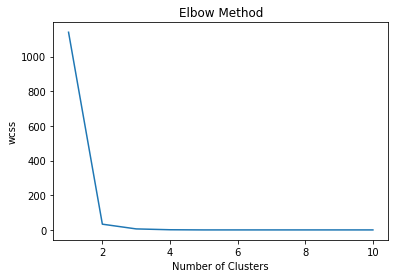

In [34]:
X = new_groups_df[['economic', 'social']].values
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

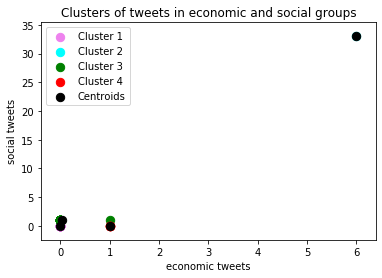

In [35]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=70, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=70, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=70, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=70, c='red', label= 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and social groups')
plt.xlabel('economic tweets')
plt.ylabel('social tweets')
plt.legend()
plt.show()